In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [3]:
df = pd.read_csv("HR_comma_sep.csv")

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [19]:
graph =  df.groupby("left").mean()

C:\Users\abc\AppData\Local\Temp\ipykernel_12992\1076964725.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graph =  df.groupby("left").mean()


In [20]:
graph

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


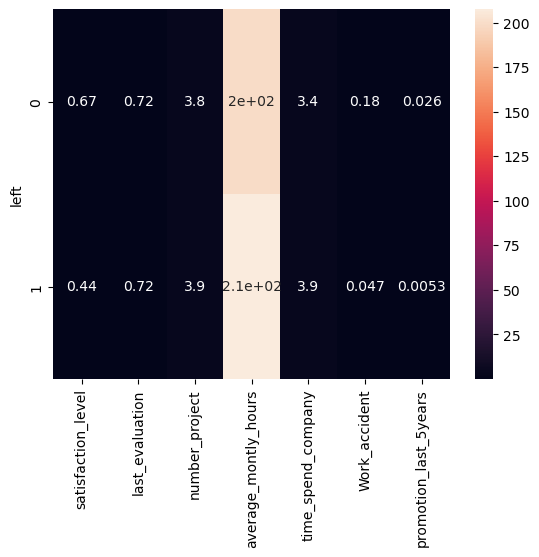

In [21]:
sns.heatmap(graph,annot = True)
plt.show()

<Axes: xlabel='salary', ylabel='left'>

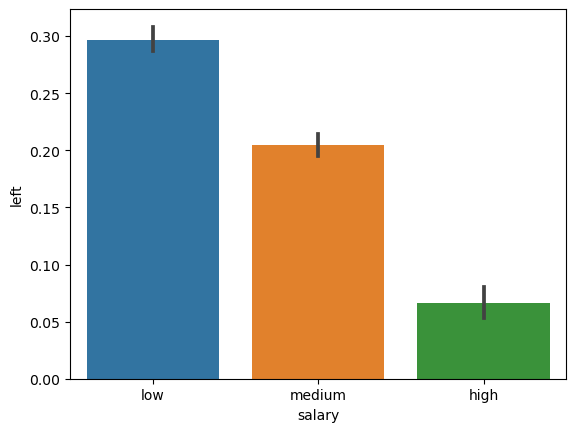

In [23]:
sns.barplot(x = "salary",y = "left",data = df)

<Axes: xlabel='salary'>

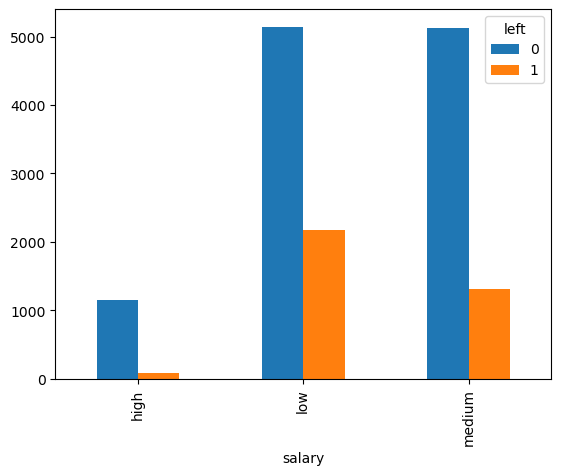

In [25]:
pd.crosstab(df.salary,df.left).plot(kind ="bar") 

<Axes: xlabel='Department', ylabel='left'>

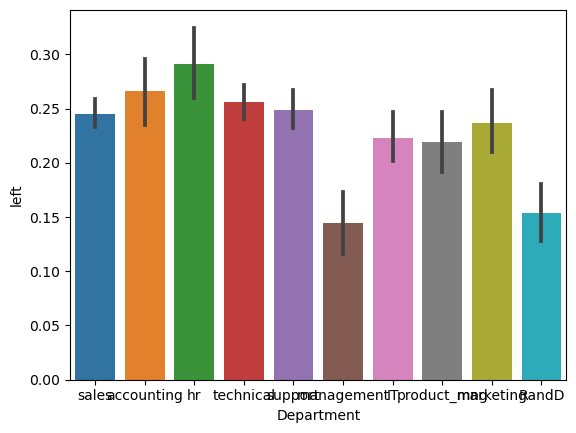

In [26]:
sns.barplot(x = "Department",y = "left",data = df)

<Axes: xlabel='Department'>

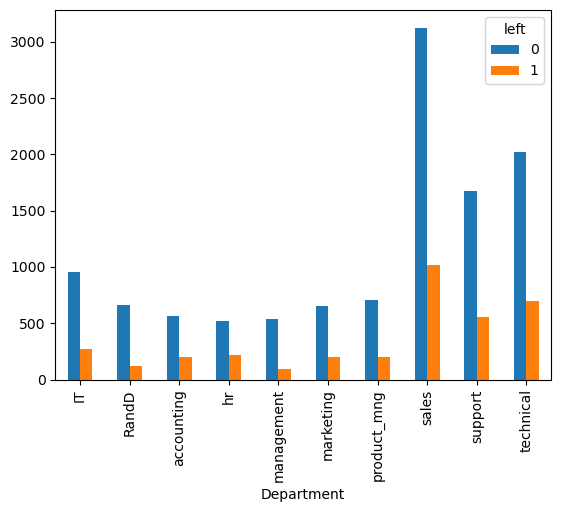

In [27]:
pd.crosstab(df.Department,df.left).plot(kind ="bar")

In [45]:
df1 = df.drop(["last_evaluation","number_project","time_spend_company","Work_accident","Department"],axis = 1)

In [74]:
subdf = df1[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]

In [75]:
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [76]:
dummy = pd.get_dummies(subdf,"salary") 

In [77]:
dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [78]:
df2 = pd.concat([subdf,dummy],axis =1)

In [79]:
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0.38,157,0,0,1,0
1,0.80,262,0,medium,0.80,262,0,0,0,1
2,0.11,272,0,medium,0.11,272,0,0,0,1
3,0.72,223,0,low,0.72,223,0,0,1,0
4,0.37,159,0,low,0.37,159,0,0,1,0


In [80]:
df3 = df2.drop(["salary","salary_high"],axis = 1)

In [81]:
df3.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,0.38,157,0,1,0
1,0.80,262,0,0.80,262,0,0,1
2,0.11,272,0,0.11,272,0,0,1
3,0.72,223,0,0.72,223,0,1,0
4,0.37,159,0,0.37,159,0,1,0


In [83]:
x = df3


In [84]:
y = df["left"]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [87]:
len(x_train)

10499

In [88]:
len(y_train)

10499

In [89]:
x_train.shape

(10499, 8)

In [90]:
y_train.shape

(10499,)

In [91]:
log = model.fit(x_train,y_train)

In [92]:
log

LogisticRegression()

In [94]:
prediction = log.predict(x_test)

In [95]:
prediction

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [96]:
score = log.score(x_test,y_test)

In [97]:
score

0.776